## Analysis and Predictions for Loan Default Data

### <p style="color:blue"> Abhishek Mandal</p>

### Library Import

In [1]:
import numpy as np
import pandas as pd

### Data Pre processing

In [2]:
df = pd.read_csv('credit.csv')

In [3]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [4]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

### Missing Value Analysis

In [5]:
df.isnull().sum().sort_values(ascending=False)

default                 0
percent_of_income       0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
years_at_residence      0
phone                   0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
checking_balance        0
dtype: int64

#### There are no missing values in the dataset

#### Getting unique values of all columns

In [6]:
for col in df:
    print(col,'-->',df[col].unique())

checking_balance --> ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
months_loan_duration --> [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
credit_history --> ['critical' 'good' 'poor' 'perfect' 'very good']
purpose --> ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
amount --> [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6

#### Changing 'car0' to 'car' as both the values seems to be same in purpose column

In [7]:
df['purpose'] = df['purpose'].replace(to_replace = 'car0', value='car')

In [8]:
# Checking for unique values of all the variables
for d in df.columns:
    count = df[d].nunique()
    print(d,count)

checking_balance 4
months_loan_duration 33
credit_history 5
purpose 5
amount 921
savings_balance 5
employment_duration 5
percent_of_income 4
years_at_residence 4
age 53
other_credit 3
housing 3
existing_loans_count 4
job 4
dependents 2
phone 2
default 2


### Exploratory Data Analysis

#### As the motive is to analyse loan default data, creating a dataframe with details of fraud claims

In [9]:
df_fraud = df[df.default=='yes']

In [10]:
df_fraud

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes
10,1 - 200 DM,12,good,car,1295,< 100 DM,< 1 year,3,1,25,none,rent,1,skilled,1,no,yes
11,< 0 DM,48,good,business,4308,< 100 DM,< 1 year,3,4,24,none,rent,1,skilled,1,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1 - 200 DM,15,very good,car,1264,100 - 500 DM,1 - 4 years,2,2,25,none,rent,1,skilled,1,no,yes
980,1 - 200 DM,30,critical,furniture/appliances,8386,< 100 DM,4 - 7 years,2,2,49,none,own,1,skilled,1,no,yes
981,unknown,48,good,business,4844,< 100 DM,unemployed,3,2,33,bank,rent,1,management,1,yes,yes
983,< 0 DM,36,good,car,8229,< 100 DM,1 - 4 years,2,2,26,none,own,1,skilled,2,no,yes


In [11]:
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

#### We will do a visual analysis of the fraud dataset, pick the columns that show considerable insights and then use them for further analysis.

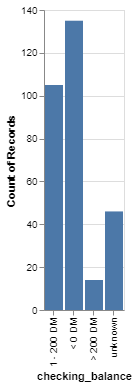

In [12]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("checking_balance"),
    y='count()',
    
)

#### <0 DM & 1-100 DM show high occurences

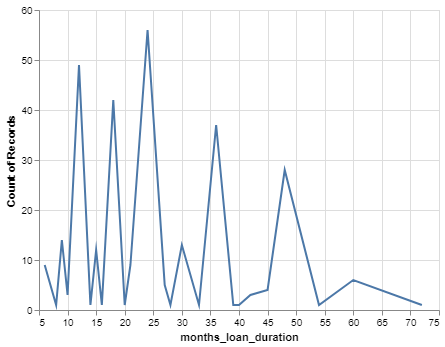

In [13]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("months_loan_duration"),
    y='count()',
    
)

#### No actionable insight found

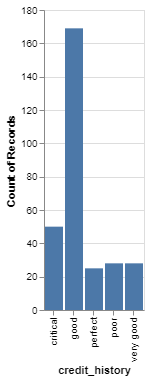

In [14]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("credit_history"),
    y='count()',
    
)

#### good shows high occurence

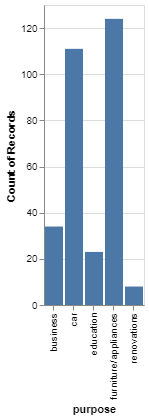

In [15]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("purpose"),
    y='count()',
    
)

#### car & furniture/appliances show high occurences

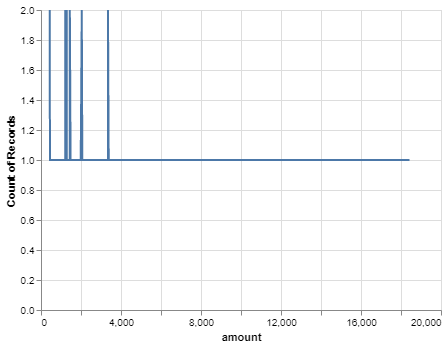

In [16]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("amount"),
    y='count()',
    
)

#### No actionable insight

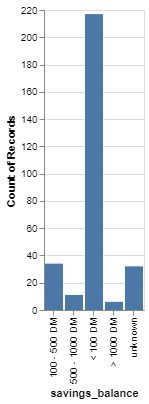

In [17]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("savings_balance"),
    y='count()',
    
)

#### <100DM show high occurence

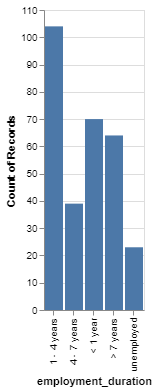

In [18]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("employment_duration"),
    y='count()',
    
)

#### 1-4 years show high occurence

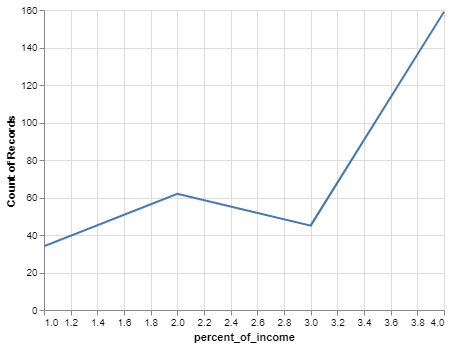

In [19]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("percent_of_income"),
    y='count()',
    
)

#### 4 shows high occurence

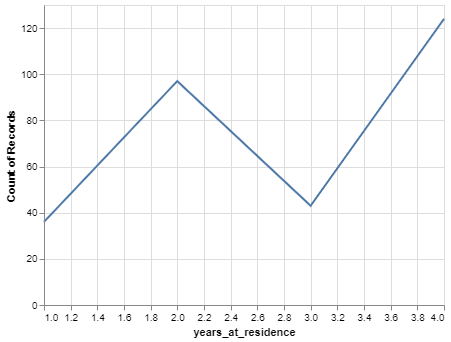

In [20]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("years_at_residence"),
    y='count()',
    
)

#### 2 & 4 show high high occurences

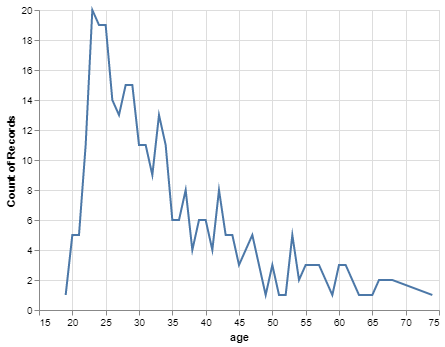

In [21]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("age"),
    y='count()',
    
)

#### 20-25 years show high occurences

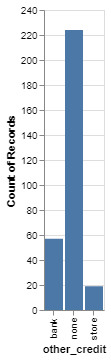

In [22]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("other_credit"),
    y='count()',
    
)

#### none shows high occurence

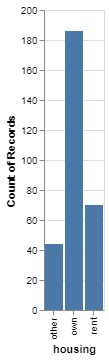

In [23]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("housing"),
    y='count()',
    
)

#### own shows high occurence

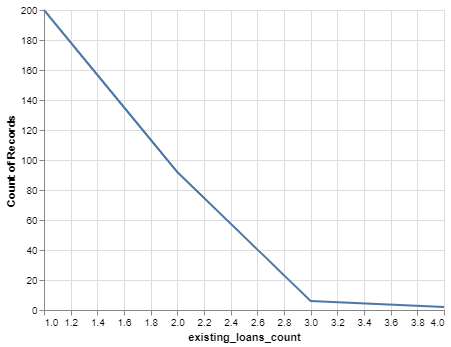

In [24]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("existing_loans_count"),
    y='count()',
    
)

#### 1 shows high occurence

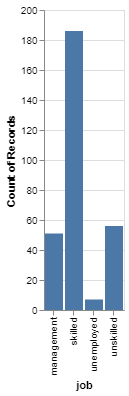

In [25]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("job"),
    y='count()',
    
)

#### skilled shows high occurence

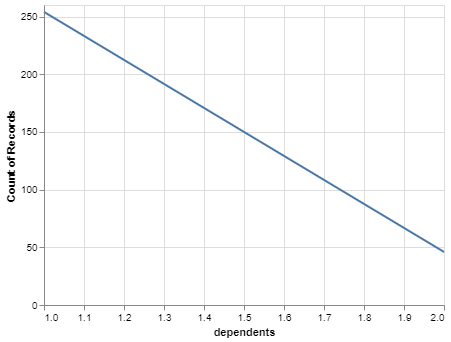

In [26]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("dependents"),
    y='count()',
    
)

#### 1 shows high occurence

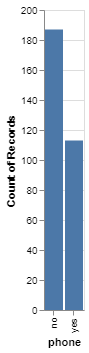

In [27]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("phone"),
    y='count()',
    
)

#### no shows high occurence

#### We will discard the columns that does not provide actionable insights and proceed with the rest of the columns for further analysis

#### As a higher occuring value in fraud dataset may be because the value has a much higer occurence in the whole dataset, we will compare the occurence percentage in both the datasets.

#### Creating a dictionary with the most common occurences in the fraud and whole dataset. checking_balance & purpose have more than 1 high occurence values, so they will be handled seperately.

#### As Age is spread over a larger numeric range, it will be visually analysed later.

In [28]:
cols_dict = {
'credit_history':'good',
'savings_balance':'< 100 DM',
'employment_duration':'1 - 4 years',
'percent_of_income':4,
'other_credit':'none',
'housing':'own',
'existing_loans_count':1,
'job':'skilled',
'dependents':1,
'phone':'no'

}

In [29]:
fraud_percent_list = []
whole_df_percent_list = []

for key, value in cols_dict.items():
    fraud_percent_list.append((df_fraud[df_fraud[key]==value].count().values[0]/300)*100) #length of fraud dataset is 300
    whole_df_percent_list.append((df[df[key]==value].count().values[0]/1000)*100) #length of whole dataset is 1000

In [30]:
cols = list(cols_dict.keys())

In [31]:
most_common_val = list(cols_dict.values())

In [32]:
compare_df = pd.DataFrame(list(zip(cols,most_common_val,fraud_percent_list,whole_df_percent_list)),
                         columns=['Column','Most common value','Percent occurence in fraud dataset','Percent occurence in whole dataset'])

In [33]:
compare_df

,Column,Most common value,Percent occurence in fraud dataset,Percent occurence in whole dataset
0,credit_history,good,56.333333,53.0
1,savings_balance,< 100 DM,72.333333,60.3
2,employment_duration,1 - 4 years,34.666667,33.9
3,percent_of_income,4,53.000000,47.6
4,other_credit,none,74.666667,81.4
5,housing,own,62.000000,71.3
6,existing_loans_count,1,66.666667,63.3
7,job,skilled,62.000000,63.0
8,dependents,1,84.666667,84.5
9,phone,no,62.333333,59.6


#### Adding values for checking_balance & purpose

In [34]:
print('Values for checking_balance')
print((df_fraud[df_fraud.checking_balance=='< 0 DM'].count().values[0]/300)*100)
print((df_fraud[df_fraud.checking_balance=='1 - 200 DM'].count().values[0]/300)*100)
print((df[df.checking_balance=='< 0 DM'].count().values[0]/1000)*100)
print((df[df.checking_balance=='1 - 200 DM'].count().values[0]/1000)*100)
print('-'*30)
print('Values for purpose')
print((df_fraud[df_fraud.purpose=='furniture/appliances'].count().values[0]/300)*100)
print((df_fraud[df_fraud.purpose=='car'].count().values[0]/300)*100)
print((df[df.purpose=='furniture/appliances'].count().values[0]/1000)*100)
print((df[df.purpose=='car'].count().values[0]/1000)*100)

Values for checking_balance
45.0
35.0
27.400000000000002
26.900000000000002
------------------------------
Values for purpose
41.333333333333336
37.0
47.3
34.9


#### Adding the values to compare_df

In [35]:
compare_df = compare_df.append({'Column':'checking_balance_1','Most common value':'< 0 DM','Percent occurence in fraud dataset':45,'Percent occurence in whole dataset':27.4},ignore_index=True)
compare_df = compare_df.append({'Column':'checking_balance_2','Most common value':'1 - 200 DM','Percent occurence in fraud dataset':35,'Percent occurence in whole dataset':26.9},ignore_index=True)
compare_df = compare_df.append({'Column':'purpose_1','Most common value':'furniture/appliances','Percent occurence in fraud dataset':41.33,'Percent occurence in whole dataset':47.3},ignore_index=True)
compare_df = compare_df.append({'Column':'purpose_2','Most common value':'car','Percent occurence in fraud dataset':37,'Percent occurence in whole dataset':34.9},ignore_index=True)

In [36]:
compare_df

,Column,Most common value,Percent occurence in fraud dataset,Percent occurence in whole dataset
0,credit_history,good,56.333333,53.0
1,savings_balance,< 100 DM,72.333333,60.3
2,employment_duration,1 - 4 years,34.666667,33.9
3,percent_of_income,4,53.000000,47.6
4,other_credit,none,74.666667,81.4
5,housing,own,62.000000,71.3
6,existing_loans_count,1,66.666667,63.3
7,job,skilled,62.000000,63.0
8,dependents,1,84.666667,84.5
9,phone,no,62.333333,59.6


#### As we can see a few columns have values occuring less in the fraud dataset than the whole dataset. As such, we will consider only those values having more occurences in the fraud dataset.

In [37]:
fraud_df = compare_df[compare_df['Percent occurence in fraud dataset']>compare_df['Percent occurence in whole dataset']]
fraud_df = fraud_df.reset_index()
fraud_df=fraud_df.drop('index',axis=1)

In [38]:
fraud_df['Most common value'] = fraud_df['Most common value'].astype('category')

In [39]:
fraud_df

,Column,Most common value,Percent occurence in fraud dataset,Percent occurence in whole dataset
0,credit_history,good,56.333333,53.0
1,savings_balance,< 100 DM,72.333333,60.3
2,employment_duration,1 - 4 years,34.666667,33.9
3,percent_of_income,4,53.000000,47.6
4,existing_loans_count,1,66.666667,63.3
5,dependents,1,84.666667,84.5
6,phone,no,62.333333,59.6
7,checking_balance_1,< 0 DM,45.000000,27.4
8,checking_balance_2,1 - 200 DM,35.000000,26.9
9,purpose_2,car,37.000000,34.9


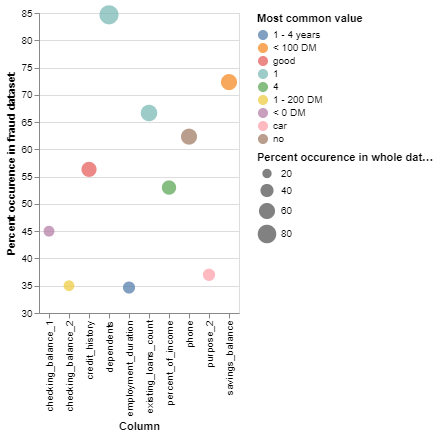

In [40]:
alt.Chart(fraud_df).mark_circle().encode(
    alt.X('Column', scale=alt.Scale(zero=False)),
    alt.Y('Percent occurence in fraud dataset', scale=alt.Scale(zero=False)),
    color='Most common value',
    size='Percent occurence in whole dataset'
)

#### Higher the dot and smaller the dot size, indicate factors more likely to indicate likely default

#### Analysing age

#### Age in fraud dataset

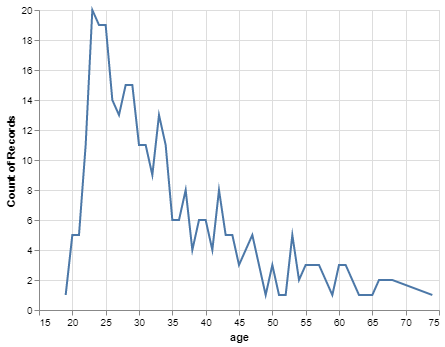

In [41]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("age"),
    y='count()',
    
)

#### Age in whole dataset

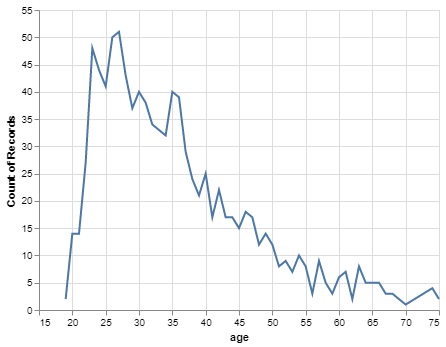

In [42]:
alt.Chart(df).mark_line().encode(
    alt.X("age"),
    y='count()',
    
)

#### We do not see much differences in the two graphs, although younger people tend to commit more default.

### Conclusions from EDA

#### A person will more likely default on loan if he/she (in decreasing order of significance):
#### <li>Savings balance less than 100DM.</li><br><li>Checking balance less than 200DM.</li><br><li>Percent of income 4</li><br><li>Has 1 existing loan account</li><br><li>Does not have a phone</li><br><li>Purpose of loan is car</li><br><li>Has a good credit history</li><br><li>Has been empployed for 1 - 4 years</li><br><li>Has 1 dependant</li><br><li>Is aged around 20-25 years</li>

### Feature Engineering

#### Encoding categorical values

In [43]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [44]:
#Encoding unknown as 0, < 0 DM as 0 and rest by taking a mean of upper and lower limits
df['checking_balance'] = df['checking_balance'].replace(to_replace = '< 0 DM', value=0)
df['checking_balance'] = df['checking_balance'].replace(to_replace = 'unknown', value=0)
df['checking_balance'] = df['checking_balance'].replace(to_replace = '1 - 200 DM', value=100)
df['checking_balance'] = df['checking_balance'].replace(to_replace = '> 200 DM', value=200)

In [45]:
#Custom encoding for credit_history
df['credit_history'] = df['credit_history'].replace(to_replace = 'critical', value=0)
df['credit_history'] = df['credit_history'].replace(to_replace = 'poor', value=1)
df['credit_history'] = df['credit_history'].replace(to_replace = 'good', value=2)
df['credit_history'] = df['credit_history'].replace(to_replace = 'very good', value=3)
df['credit_history'] = df['credit_history'].replace(to_replace = 'perfect', value=4)

In [46]:
#Auto encoding for purpose
df['purpose'] = df['purpose'].astype('category').cat.codes 

In [47]:
#Custom encoding for savings_balance
df['savings_balance'] = df['savings_balance'].replace(to_replace = 'unknown', value=0)
df['savings_balance'] = df['savings_balance'].replace(to_replace = '< 100 DM', value=50)
df['savings_balance'] = df['savings_balance'].replace(to_replace = '500 - 1000 DM', value=750)
df['savings_balance'] = df['savings_balance'].replace(to_replace = '100 - 500 DM', value=300)
df['savings_balance'] = df['savings_balance'].replace(to_replace = '> 1000 DM', value=1000)

In [48]:
#Custom encoding for employment_duration
df['employment_duration'] = df['employment_duration'].replace(to_replace = '< 1 year', value=0.5)
df['employment_duration'] = df['employment_duration'].replace(to_replace = '1 year', value=1)
df['employment_duration'] = df['employment_duration'].replace(to_replace = '1 - 4 years', value=2.5)
df['employment_duration'] = df['employment_duration'].replace(to_replace = '4 - 7 years', value=6.5)
df['employment_duration'] = df['employment_duration'].replace(to_replace = 'unemployed', value=0)
df['employment_duration'] = df['employment_duration'].replace(to_replace = '> 7 years', value=7)

In [49]:
#Custom encoding for other_credit
df['other_credit'] = df['other_credit'].replace(to_replace = 'none', value=0)
df['other_credit'] = df['other_credit'].replace(to_replace = 'bank', value=2)
df['other_credit'] = df['other_credit'].replace(to_replace = 'store', value=1)

In [50]:
#Custom encoding for housing
df['housing'] = df['housing'].replace(to_replace = 'own', value=2)
df['housing'] = df['housing'].replace(to_replace = 'other', value=1)
df['housing'] = df['housing'].replace(to_replace = 'rent', value=0)

In [51]:
#Custom encoding for job
df['job'] = df['job'].replace(to_replace = 'unemployed', value=0)
df['job'] = df['job'].replace(to_replace = 'unskilled', value=1)
df['job'] = df['job'].replace(to_replace = 'skilled', value=2)
df['job'] = df['job'].replace(to_replace = 'management', value=3)

In [52]:
#Custom encoding for phone
df['phone'] = df['phone'].replace(to_replace = 'no', value=0)
df['phone'] = df['phone'].replace(to_replace = 'yes', value=0)

In [53]:
#Custom encoding for default
df['default'] = df['default'].replace(to_replace = 'no', value=0)
df['default'] = df['default'].replace(to_replace = 'yes', value=1)

#### Outlier Analysis

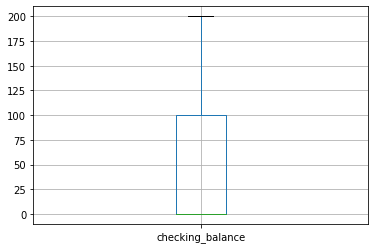

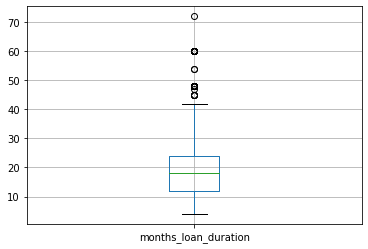

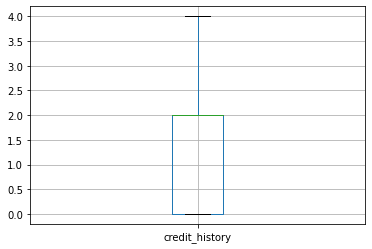

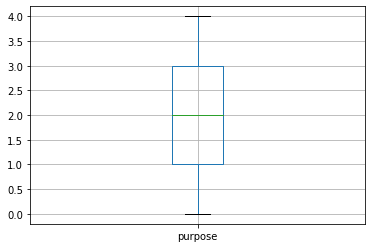

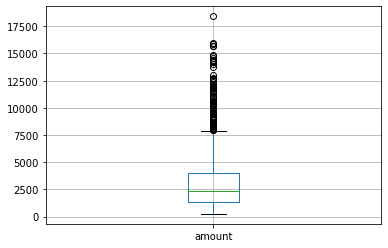

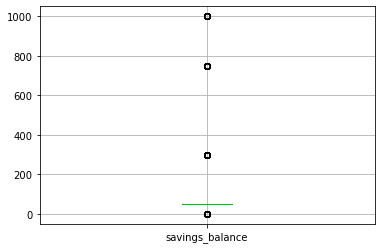

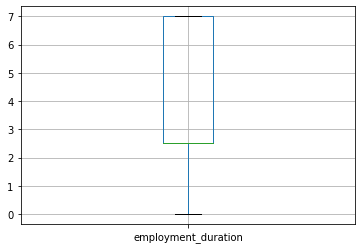

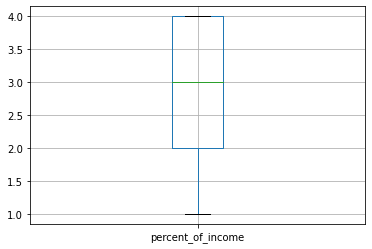

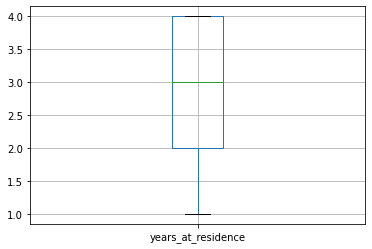

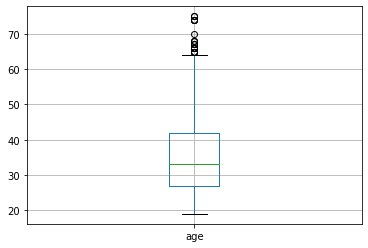

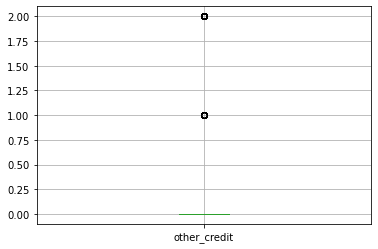

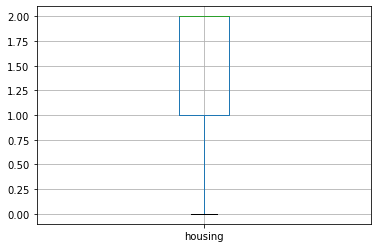

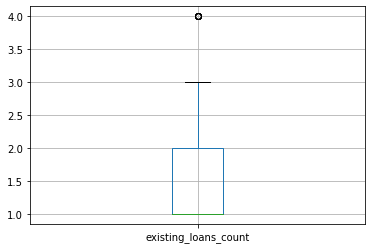

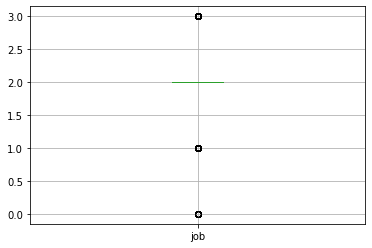

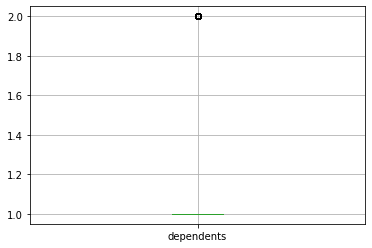

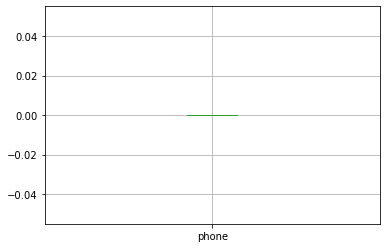

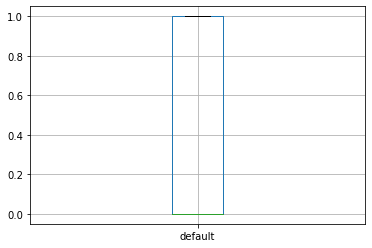

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for column in df.columns:
    #print(column)
    plt.figure()
    df.boxplot([column])

#### Removing Outliers

df = df[df.months_loan_duration<41]
df = df[df.amount<5000]
df = df[df.savings_balance<250]
df = df[df.savings_balance>5]
df = df[df.age<50]
df = df[df.other_credit<0.75]
df = df[df.existing_loans_count<3]
df = df[df.job<2.5]
df = df[df.job>1]
df = df[df.dependents<1.8]

#### <p style="color:red">Skipping this step as the dataset is too small and removing outliers actually removes too much data and the model does not fit properly.</p>

#### Heatmap Analysis

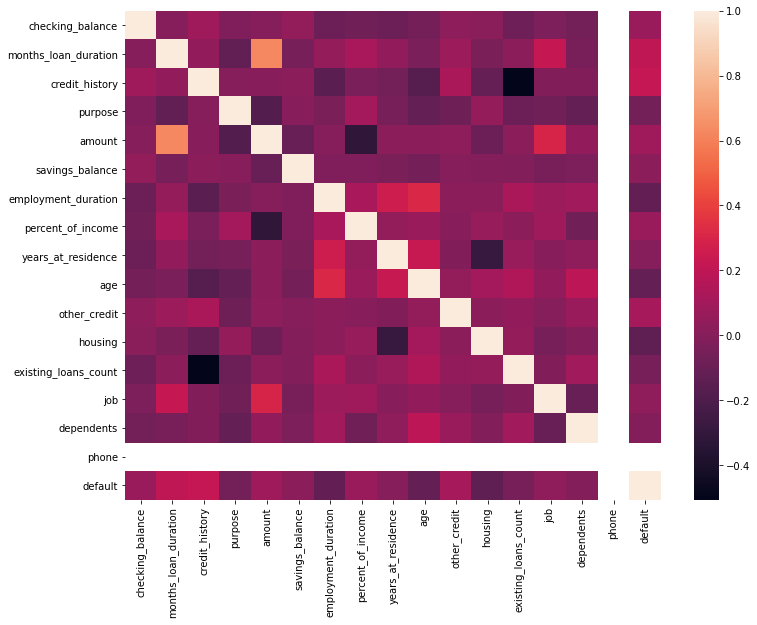

In [55]:
corrmat = df.corr(method="spearman")
f, ax = plt.subplots(figsize=(12, 9))
corrmat
sns.heatmap(corrmat, xticklabels=True, yticklabels=True);

In [56]:
corrmat

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
checking_balance,1.000000,0.002961,0.093269,-0.023108,0.000149,0.050454,-0.090722,-0.073827,-0.089282,-0.054675,0.033649,0.016276,-0.082013,-0.024634,-0.063692,NaN,0.075739
months_loan_duration,0.002961,1.000000,0.041502,-0.128380,0.624709,-0.052972,0.057358,0.118046,0.043671,-0.036316,0.079400,-0.032870,0.028430,0.227266,-0.043265,NaN,0.205685
credit_history,0.093269,0.041502,1.000000,0.003324,0.011043,0.023469,-0.147885,-0.037277,-0.059558,-0.168350,0.125197,-0.107871,-0.506025,-0.016000,-0.013762,NaN,0.221606
purpose,-0.023108,-0.128380,0.003324,1.000000,-0.179233,0.006543,-0.031188,0.103355,-0.047950,-0.117180,-0.084016,0.052919,-0.090827,-0.067946,-0.113161,NaN,-0.060819
amount,0.000149,0.624709,0.011043,-0.179233,1.000000,-0.100830,0.000767,-0.313100,0.023646,0.026298,0.033179,-0.090845,0.023778,0.298345,0.041815,NaN,0.087083
savings_balance,0.050454,-0.052972,0.023469,0.006543,-0.100830,1.000000,-0.021984,-0.022539,-0.030810,-0.057257,0.004049,-0.001917,-0.007194,-0.042903,-0.025680,NaN,0.021673
employment_duration,-0.090722,0.057358,-0.147885,-0.031188,0.000767,-0.021984,1.000000,0.120560,0.256016,0.312243,0.027165,0.025803,0.135160,0.078667,0.097371,NaN,-0.119806
percent_of_income,-0.073827,0.118046,-0.037277,0.103355,-0.313100,-0.022539,0.120560,1.000000,0.047507,0.072157,0.011361,0.063494,0.020997,0.085165,-0.072543,NaN,0.073690
years_at_residence,-0.089282,0.043671,-0.059558,-0.047950,0.023646,-0.030810,0.256016,0.047507,1.000000,0.234709,-0.012441,-0.285969,0.067193,0.006186,0.040455,NaN,0.002553
age,-0.054675,-0.036316,-0.168350,-0.117180,0.026298,-0.057257,0.312243,0.072157,0.234709,1.000000,0.048924,0.102691,0.141287,0.041327,0.190651,NaN,-0.112191


#### There are no multicolinear columns

#### <p style="color:red"> Skipping feature scaling as the dataset is small and mostly numerical and scaling does not improve the performance of the classifiers considerably.</p>

### Creating test and train data

In [57]:
y = df.default
x = df.drop('default', axis=1)

print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',x.shape)

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=101)

print('x_train dimentions: ',x_train.shape)
print('y_train  dimentions: ',y_train.shape)
print('x_test dimentions: ',x_test.shape)
print('y_test  dimentions: ',y_test.shape)

Target dimentions:  (1000,)
Independent data dimentions:  (1000, 16)
x_train dimentions:  (700, 16)
y_train  dimentions:  (700,)
x_test dimentions:  (300, 16)
y_test  dimentions:  (300,)


#### As all dimentions are correct, we can move towards model creation, training and testing

### Machine Learning

In [58]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1),
    lgb.LGBMClassifier(),
    XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
    ]
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [59]:
accuracy = []
f1_sc = []
recall = []
precision = []
loss = []

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    accuracy.append(acc)
    
    f1 = f1_score(y_test, train_predictions, average='weighted')
    print('F1 score:{:.4%}'.format(f1))
    f1_sc.append(f1)
    
    recall_sc = recall_score(y_test, train_predictions, average='weighted')
    print('Recall:{:.4%}'.format(recall_sc))
    recall.append(recall_sc)
    
    pr_score = precision_score(y_test, train_predictions, average='weighted')
    print('Precision:{:.4%}'.format(pr_score))
    precision.append(pr_score)
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    loss.append(ll)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 64.0000%
F1 score:61.8995%
Recall:64.0000%
Precision:61.0396%
Log Loss: 3.885484273463717
SVC
****Results****
Accuracy: 68.0000%
F1 score:55.0476%
Recall:68.0000%
Precision:46.2400%
Log Loss: 0.6192759895817377
DecisionTreeClassifier
****Results****
Accuracy: 62.3333%
F1 score:62.7518%
Recall:62.3333%
Precision:63.2762%
Log Loss: 13.009605775416357


C:\Users\maila\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
****Results****
Accuracy: 72.0000%
F1 score:68.5988%
Recall:72.0000%
Precision:70.2369%
Log Loss: 0.5379854114256107
AdaBoostClassifier
****Results****
Accuracy: 70.0000%
F1 score:67.3919%
Recall:70.0000%
Precision:67.5995%
Log Loss: 0.6820246106923981
GradientBoostingClassifier
****Results****
Accuracy: 73.0000%
F1 score:70.3912%
Recall:73.0000%
Precision:71.4595%
Log Loss: 0.5497992708584049
GaussianNB
****Results****
Accuracy: 73.0000%
F1 score:71.7585%
Recall:73.0000%
Precision:71.6423%
Log Loss: 0.6303488211841722
LinearDiscriminantAnalysis
****Results****
Accuracy: 72.0000%
F1 score:67.9249%
Recall:72.0000%
Precision:70.4923%
Log Loss: 0.5459412881782754
MLPClassifier
****Results****
Accuracy: 67.3333%
F1 score:54.7251%
Recall:67.3333%
Precision:46.0940%
Log Loss: 6.719313682451067
LGBMClassifier
****Results****
Accuracy: 75.3333%
F1 score:73.8941%
Recall:75.3333%
Precision:74.2222%
Log Loss: 0.6388481802456886
XGBClassifier
****Results****
Accuracy: 72.666

### Evaluating the classifiers

#### From the classification matrices, we can see that GaussianNB and LightGBM classifiers have the best performances. Hence we will evaluate them further to finalise the best classifier.

#### Plotting Precision-Recall curve

#### PR Curve for GaussianNB

C:\Users\maila\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\maila\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


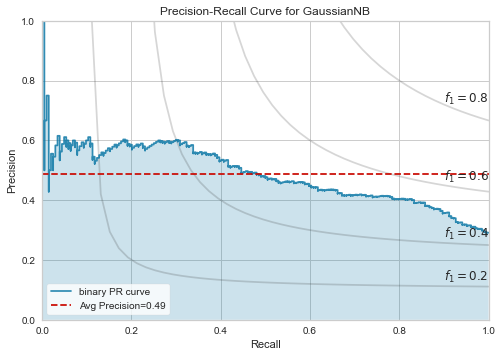

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve


plot = PrecisionRecallCurve(classifiers[6],per_class=True, iso_f1_curves=True,
fill_area=True, micro=False)
plot.fit(x_train, y_train)
plot.score(x_train, y_train)
plot.show()

#### PR Curve for LightGBM

C:\Users\maila\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


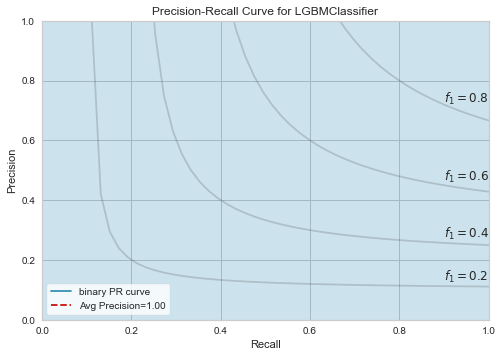

In [72]:
plot = PrecisionRecallCurve(classifiers[9],per_class=True, iso_f1_curves=True,
fill_area=True, micro=False)
plot.fit(x_train, y_train)
plot.score(x_train, y_train)
plot.show()

### Validating the 2 best classifiers

#### Creating validation data

In [62]:
val_df = df[800:1000]
val_actual_X = val_df.default
val_Y = val_df.drop('default', axis=1)

#### Validating the data on GaussianNB

In [66]:
val_pred_GNB = classifiers[6].predict(val_Y)

#### Generating classification report and confusion matrix

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix for GaussianNB Classifier')
print('-'*30)
print(confusion_matrix(val_actual_X,val_pred_GNB, labels=[1,0]))

print('Classification Report for GaussianNB Classifier')
print('-'*30)
print(classification_report(val_actual_X,val_pred_GNB))

Confusion Matrix for GaussianNB Classifier
------------------------------
[[ 29  32]
 [ 26 113]]
Classification Report for GaussianNB Classifier
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.53      0.48      0.50        61

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.65       200
weighted avg       0.70      0.71      0.71       200



#### Validating the data on LightGBM

In [73]:
val_pred_LGBM = classifiers[9].predict(val_Y)

#### Generating classification report and confusion matrix

In [74]:
print('Confusion Matrix for LightGBM Classifier')
print('-'*30)
print(confusion_matrix(val_actual_X,val_pred_LGBM, labels=[1,0]))

print('Classification Report for LightGBM Classifier')
print('-'*30)
print(classification_report(val_actual_X,val_pred_LGBM))

Confusion Matrix for LightGBM Classifier
------------------------------
[[ 50  11]
 [  4 135]]
Classification Report for LightGBM Classifier
------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       139
           1       0.93      0.82      0.87        61

    accuracy                           0.93       200
   macro avg       0.93      0.90      0.91       200
weighted avg       0.93      0.93      0.92       200



#### From the above charts and reports, we can say that LightGBM classifier performs the best for this dataset.